In [166]:
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [167]:
cleaned_hm= pd.read_csv('cleaned_hm.csv')
demographic = pd.read_csv('demographic.csv')
cleaned_hm.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


In [168]:
demographic.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


In [169]:
cleaned_hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 6.2+ MB


In [170]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   wid         10844 non-null  int64 
 1   age         10809 non-null  object
 2   country     10771 non-null  object
 3   gender      10812 non-null  object
 4   marital     10787 non-null  object
 5   parenthood  10813 non-null  object
dtypes: int64(1), object(5)
memory usage: 508.4+ KB


In [171]:
 # creating another column named "length" that contains the length of the words in "cleaned_hm" column
cleaned_hm['length'] = cleaned_hm['cleaned_hm'].apply(lambda x: len(x.split()))

In [172]:
#mergin both cleaned_hm and demographic files
cleaned_hm = pd.merge(cleaned_hm, demographic, on='wid', validate = 'm:1') 

In [173]:
#Column "reflection period" contains only two values i.e. "24h" and "3m", replacing these with 0 and 1
cleaned_hm.loc[cleaned_hm['reflection_period']=='24h', 'reflection_period']=0
cleaned_hm.loc[cleaned_hm['reflection_period']=='3m', 'reflection_period']=1
cleaned_hm.rename(columns={'3m': '3m or 24h'}, inplace=True)

In [174]:
cleaned_hm

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,length,age,country,gender,marital,parenthood
0,27673,2053,0,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,14,35,USA,m,single,n
1,27873,2053,0,I played a new game that was fun and got to en...,I played a new game that was fun and got to en...,True,1,NaN,leisure,16,35,USA,m,single,n
2,28073,2053,0,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,NaN,leisure,17,35,USA,m,single,n
3,33522,2053,0,Went to see a movie with my friend,Went to see a movie with my friend,True,1,NaN,bonding,8,35,USA,m,single,n
4,34522,2053,0,"Played guitar, learning a song on it","Played guitar, learning a song on it",True,1,NaN,leisure,7,35,USA,m,single,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100530,128251,11402,0,Was told I was a great employee by my boss.,Was told I was a great employee by my boss.,True,1,NaN,achievement,10,32,USA,m,married,n
100531,128751,11402,0,Fixed my car.,Fixed my car.,True,1,NaN,achievement,3,32,USA,m,married,n
100532,127759,11050,0,Four year back I lost my job. Now I am living ...,Four year back I lost my job. Now I am living ...,True,6,NaN,achievement,58,65,IND,m,married,y
100533,128259,11050,0,Yesterday evening I received a call from unkno...,Yesterday evening I received a call from unkno...,True,7,bonding,bonding,71,65,IND,m,married,y


In [177]:
cols=['hmid',
 'wid',
 'cleaned_hm',
 'num_sentence',
 'predicted_category',
 'length',
 'age',
 'country',
 'gender',
 'marital',
 'parenthood',
 'reflection_period']

In [178]:
# dropping unnecessary columns like original_hm and modified.
cleaned_hm = cleaned_hm[cols] 

In [179]:
cleaned_hm

,hmid,wid,cleaned_hm,num_sentence,predicted_category,length,age,country,gender,marital,parenthood,reflection_period
0,27673,2053,I went on a successful date with someone I fel...,1,affection,14,35,USA,m,single,n,0
1,27873,2053,I played a new game that was fun and got to en...,1,leisure,16,35,USA,m,single,n,0
2,28073,2053,I listened to some music and heard an entire a...,1,leisure,17,35,USA,m,single,n,0
3,33522,2053,Went to see a movie with my friend,1,bonding,8,35,USA,m,single,n,0
4,34522,2053,"Played guitar, learning a song on it",1,leisure,7,35,USA,m,single,n,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100530,128251,11402,Was told I was a great employee by my boss.,1,achievement,10,32,USA,m,married,n,0
100531,128751,11402,Fixed my car.,1,achievement,3,32,USA,m,married,n,0
100532,127759,11050,Four year back I lost my job. Now I am living ...,6,achievement,58,65,IND,m,married,y,0
100533,128259,11050,Yesterday evening I received a call from unkno...,7,bonding,71,65,IND,m,married,y,0


In [182]:
cleaned_hm["marital"].value_counts()

single       54106
married      41343
divorced      3803
separated      649
widowed        477
Name: marital, dtype: int64

In [185]:
# Dividing the data between two categories i.e. married and unmarried
cleaned_hm.loc[happy['marital']=='single', 'marital']=0
cleaned_hm.loc[happy['marital']=='married', 'marital']=1
cleaned_hm.loc[happy['marital']=='separated', 'marital']=0
cleaned_hm.loc[happy['marital']=='divorced', 'marital']=0
cleaned_hm.loc[happy['marital']=='widowed', 'marital']=0

In [186]:
cleaned_hm['marital'].dropna(inplace=True) #Dropping NA values

In [188]:
cleaned_hm["marital"].value_counts()

0    59035
1    41343
Name: marital, dtype: int64

In [190]:
cleaned_hm["gender"].value_counts()

m    57690
f    42069
o      697
Name: gender, dtype: int64

In [112]:
# Dividing the data betwen 2 categories i.e. female and others
cleaned_hm.loc[cleaned_hm['gender']=='m', 'gender']=0
cleaned_hm.loc[cleaned_hm['gender']=='f', 'gender']=1
cleaned_hm.loc[cleaned_hm['gender']=='o', 'gender']=0

In [192]:
cleaned_hm["predicted_category"].value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

In [194]:
# Giving numbers to all categories for easier understanding
cleaned_hm.loc[cleaned_hm['predicted_category']=='achievement', 'predicted_category']=1
cleaned_hm.loc[cleaned_hm['predicted_category']=='affection', 'predicted_category']=2
cleaned_hm.loc[cleaned_hm['predicted_category']=='bonding', 'predicted_category']=3
cleaned_hm.loc[cleaned_hm['predicted_category']=='enjoy_the_moment', 'predicted_category']=4
cleaned_hm.loc[cleaned_hm['predicted_category']=='exercise', 'predicted_category']=5
cleaned_hm.loc[cleaned_hm['predicted_category']=='leisure', 'predicted_category']=6
cleaned_hm.loc[cleaned_hm['predicted_category']=='nature', 'predicted_category']=7

In [196]:
cleaned_hm["parenthood"].value_counts()

n    60937
y    39520
Name: parenthood, dtype: int64

In [197]:
cleaned_hm.head()

,hmid,wid,cleaned_hm,num_sentence,predicted_category,length,age,country,gender,marital,parenthood,reflection_period
0,27673,2053,I went on a successful date with someone I fel...,1,2,14,35,USA,m,0,n,0
1,27873,2053,I played a new game that was fun and got to en...,1,6,16,35,USA,m,0,n,0
2,28073,2053,I listened to some music and heard an entire a...,1,6,17,35,USA,m,0,n,0
3,33522,2053,Went to see a movie with my friend,1,3,8,35,USA,m,0,n,0
4,34522,2053,"Played guitar, learning a song on it",1,6,7,35,USA,m,0,n,0


In [199]:
#Giving numbers to parenthood for easier understanding and manipulation
cleaned_hm.loc[cleaned_hm['parenthood']=='n', 'parenthood']=0
cleaned_hm.loc[cleaned_hm['parenthood']=='y', 'parenthood']=1

In [201]:
cleaned_hm["country"].value_counts()

USA    79063
IND    16729
VEN      588
CAN      555
GBR      364
       ...  
SLV        3
TUN        3
LVA        3
ECU        3
IRQ        3
Name: country, Length: 100, dtype: int64

In [215]:
#Changing the first 5 countries to numbers 
cleaned_hm.loc[cleaned_hm['country']=='USA', 'country']=1
cleaned_hm.loc[cleaned_hm['country']=='IND', 'country']=0
cleaned_hm.loc[cleaned_hm['country']=='VEN', 'country']=0
cleaned_hm.loc[cleaned_hm['country']=='CAN', 'country']=0
cleaned_hm.loc[cleaned_hm['country']=='GBR', 'country']=0


In [203]:
cleaned_hm["country"].value_counts()

1      79063
0      18236
PHL      279
MEX      150
VNM      126
       ...  
HKG        3
SLV        3
GHA        3
ZMB        3
VIR        3
Name: country, Length: 97, dtype: int64

In [205]:
#chaging country values to 0 if its a string
def convert_string(x):
    if isinstance(x, str) == True:
        return 0
    else: return x
cleaned_hm['country']=cleaned_hm['country'].apply(lambda x: convert_string(x))

In [206]:
cleaned_hm['country'] 

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
100530    1.0
100531    1.0
100532    0.0
100533    0.0
100534    0.0
Name: country, Length: 100535, dtype: float64

In [208]:
cleaned_hm["country"].value_counts()

1.0    79063
0.0    21269
Name: country, dtype: int64

In [210]:
#Dividing the age into 2 categories i.e less than 25, greater than or equal to 25
for i in range(len(cleaned_hm)):
    cleaned_hm['age']=int(cleaned_hm['age'][i]) #typecasting age from string to int
cleaned_hm=cleaned_hm[cleaned_hm['age']<150] # Drop rows with age > 150 years
cleaned_hm.loc[cleaned_hm['age']<25,  'age']=0
cleaned_hm.loc[cleaned_hm['age']>=25, 'age']=1
cleaned_hm.head(1)


,hmid,wid,cleaned_hm,num_sentence,predicted_category,length,age,country,gender,marital,parenthood,reflection_period
0,27673,2053,I went on a successful date with someone I fel...,1,2,14,1,1.0,m,0,0,0


In [125]:
len(cleaned_hm)

100535

In [ ]:
#VISUALIZATION 

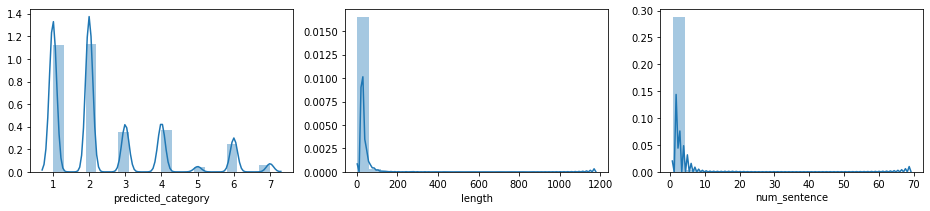

In [132]:
#Distribution of predicted_category, length and num_sentence
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(16,3))
sns.distplot(cleaned_hm['predicted_category'], bins=20, ax=axis1,kde_kws={'bw':0.1})
sns.distplot(cleaned_hm['length'], bins=20, ax=axis2,kde_kws={'bw':0.1})
sns.distplot(cleaned_hm['num_sentence'], bins=20, ax=axis3,kde_kws={'bw':0.1})

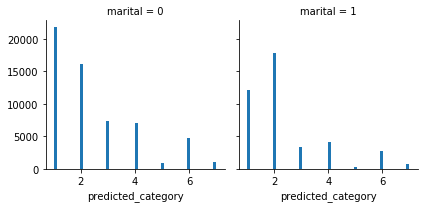

In [133]:
#Bi-variate analysis
g = sns.FacetGrid(data=cleaned_hm, col='marital')
g.map(plt.hist,'predicted_category', bins=50)

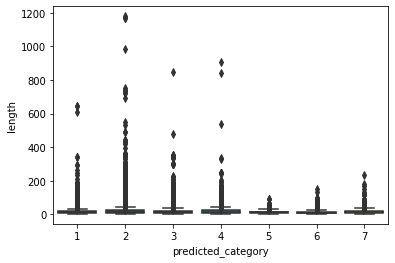

In [134]:
sns.boxplot(x='predicted_category', y='length', data=cleaned_hm, palette = 'viridis')

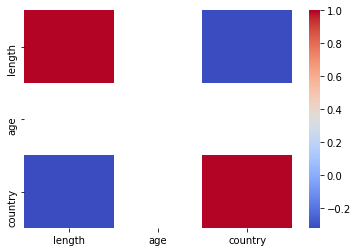

In [135]:
cleaned_hm2 = cleaned_hm.drop({'hmid', 'wid', 'num_sentence'}, axis=1)
sns.heatmap(cleaned_hm2.groupby('predicted_category').mean().corr(), cmap='coolwarm')

In [136]:
cleaned_hm

,hmid,wid,cleaned_hm,num_sentence,predicted_category,length,age,country,gender,marital,parenthood,reflection_period
0,27673,2053,I went on a successful date with someone I fel...,1,2,14,1,1.0,0,0,0,0
1,27873,2053,I played a new game that was fun and got to en...,1,6,16,1,1.0,0,0,0,0
2,28073,2053,I listened to some music and heard an entire a...,1,6,17,1,1.0,0,0,0,0
3,33522,2053,Went to see a movie with my friend,1,3,8,1,1.0,0,0,0,0
4,34522,2053,"Played guitar, learning a song on it",1,6,7,1,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100530,128251,11402,Was told I was a great employee by my boss.,1,1,10,1,1.0,0,1,0,0
100531,128751,11402,Fixed my car.,1,1,3,1,1.0,0,1,0,0
100532,127759,11050,Four year back I lost my job. Now I am living ...,6,1,58,1,0.0,0,1,1,0
100533,128259,11050,Yesterday evening I received a call from unkno...,7,3,71,1,0.0,0,1,1,0


In [143]:
#Classifier
i=11 # Selecting feature in this column (counting from 0)
cleaned_class = cleaned_hm[(cleaned_hm.iloc[:,i]==0) | (cleaned_hm.iloc[:,i]==1)]
X=cleaned_class['cleaned_hm']
y=cleaned_class.iloc[:,i]
y = np.asarray(y,dtype=np.float64) # Convert y to float64 format

In [146]:
CV = CountVectorizer()

In [147]:
X = CV.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [153]:
nb = MultinomialNB()

In [154]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [155]:
predictions = nb.predict(X_test)
acc_nb = nb.score(X_test, y_test) # Return the mean accuracy
print('Classification Report \n',classification_report(y_test, predictions))
print('\n Confusion Matrix')
cm = pd.DataFrame(confusion_matrix(y_test, predictions), ['Actual: 0', 'Actual: 1'], ['Predicted: 0', 'Predicted: 1'])
print(cm)

Classification Report 
               precision    recall  f1-score   support

         0.0       0.65      0.65      0.65     14981
         1.0       0.65      0.65      0.65     15180

    accuracy                           0.65     30161
   macro avg       0.65      0.65      0.65     30161
weighted avg       0.65      0.65      0.65     30161


 Confusion Matrix
           Predicted: 0  Predicted: 1
Actual: 0          9671          5310
Actual: 1          5251          9929


In [156]:
acc_nb

0.6498458273929909

In [157]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB())
    ])

In [158]:
i=7 # Selecting feature in this column (counting from 0)
cleaned_class = cleaned_hm[(cleaned_hm.iloc[:,i]==0) | (cleaned_hm.iloc[:,i]==1)]
X=cleaned_class['cleaned_hm']
y=cleaned_class.iloc[:,i]
y = np.asarray(y,dtype=np.float64) # Convert y to float64 format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [159]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [160]:
predictions = pipeline.predict(X_test)
print('Classification Report \n',classification_report(y_test, predictions))
print('\n Confusion Matrix')
cm = pd.DataFrame(confusion_matrix(y_test, predictions), ['Actual: 0', 'Actual: 1'], ['Predicted: 0', 'Predicted: 1'])
print(cm)

Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.30      0.46      6386
         1.0       0.84      0.99      0.91     23714

    accuracy                           0.85     30100
   macro avg       0.89      0.65      0.68     30100
weighted avg       0.86      0.85      0.81     30100


 Confusion Matrix
           Predicted: 0  Predicted: 1
Actual: 0          1929          4457
Actual: 1           134         23580


In [162]:
accuracies_data=np.arange(5.0) # Create dataframe accuracies_data to store all scores
for i in range(7,12):
    # 1 Extract column i of happy dataframe only for values equal to 0 or 1, then split test from train data
    cleaned_class = cleaned_hm[(cleaned_hm.iloc[:,i]==0) | (cleaned_hm.iloc[:,i]==1)]
    X = cleaned_class['cleaned_hm'] # Text column only
    y = cleaned_class.iloc[:,i]
    y = np.asarray(y, dtype=np.float64)
    # Create vectors with frequency info for each text description
    CV = CountVectorizer()
    X  = CV.fit_transform(X) # creates vectors with frequency info for each rating text description
    
    # 2 Train Test Split, create instance and train classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    nb = MultinomialNB()
    nb.fit(X_train, y_train)

    # 3 Apply predictor for test data
    predictions = nb.predict(X_test)
    accuracies_data[i-7] = nb.score(X_test, y_test)
accuracies_data

array([0.87209302, 0.66021834, 0.68941356, 0.69871922, 0.64984583])

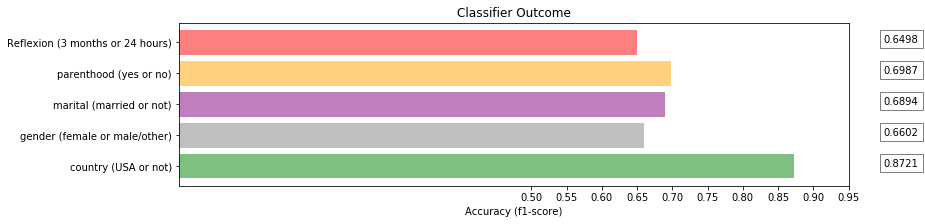

In [163]:
accuracies_data = accuracies_data.round(4) # Round all values to 4 digits
objects = ('country (USA or not)',
           'gender (female or male/other)',
           'marital (married or not)',
           'parenthood (yes or no)',
           'Reflexion (3 months or 24 hours)')
y_pos = np.arange(len(objects))   
plt.figure(figsize=(12,3))
plt.barh(y_pos, accuracies_data, left = 0, align='center', alpha=0.5,
         color=['green', 'grey', 'purple', 'orange', 'red'], tick_label= accuracies_data)
plt.yticks(y_pos, objects, rotation='horizontal')
plt.xticks(np.arange(0.5, 1, step=0.05))
#plt.axes([0.2,0.1,0.9,0.9])
plt.xlabel('Accuracy (f1-score)')
for i, v in enumerate(accuracies_data):
    plt.text(1, i, str(v), color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.title('Classifier Outcome')
plt.show()

In [164]:
cleaned_hm.head()

,hmid,wid,cleaned_hm,num_sentence,predicted_category,length,age,country,gender,marital,parenthood,reflection_period
0,27673,2053,I went on a successful date with someone I fel...,1,2,14,1,1.0,0,0,0,0
1,27873,2053,I played a new game that was fun and got to en...,1,6,16,1,1.0,0,0,0,0
2,28073,2053,I listened to some music and heard an entire a...,1,6,17,1,1.0,0,0,0,0
3,33522,2053,Went to see a movie with my friend,1,3,8,1,1.0,0,0,0,0
4,34522,2053,"Played guitar, learning a song on it",1,6,7,1,1.0,0,0,0,0
